<a href="https://colab.research.google.com/github/fkvldjtm/LGMRepo/blob/master/ai08_sc43x_%EC%9D%B4%EA%B1%B4%EB%AF%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## AIB / SECTION 4 / SC43x 

---



# Major Neural Network Architectures

이번 한 주간 CNN, U-Net, Autoencoder, GAN 등 다양한 주요 신경망 구조들에 대해서 배워봤습니다. 오늘은 그 모델들을 복습하는 시간을 가지도록 하겠습니다. 이 SC는 **신경망의 다양한 구조에 대한 이해와 지식**을 평가합니다. **모델을 높은 정확도를 가지도록 학습 시킬 수 있는지를 평가하려는 것이 아닙니다.**

아래의 방식들은 복잡한 연산을 요구합니다. 모든 파트의 문제들은 어떤 환경에서라도 (e.g. 로컬 주피터, Google Colab, etc.) 5-10분 내외로 결과값이 나오도록 제작이 됐기 때문에 만일 결과값을 도출하는데 그 이상의 시간이 걸린다면 여러분의 접근 방식을 재점검해보시기 바랍니다.

---

## 1. CNN

### 이미지 분류
Keras와  [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained)을 활용하여 `im_frog` 폴더에 있는 이미지 중 어떤 이미지에 개구리가 있는지 찾는 이미지 분류 모델을 작동시켜 보겠습니다.

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

## 2.1 Resnet$V_2$을 사용하기 위해서 전처리 함수를 사용하여 이미지를 전처리 하고 이미지들의 사이즈를 재조정하는 함수를 정의해봅시다.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


- **파일 경로와 이름을 불러옵니다.**

In [5]:
import os
import pathlib

cur_path = os.getcwd()
frog_dir = pathlib.Path(os.path.join(cur_path,'drive','MyDrive','im_frog'))
frog_dir

PosixPath('/content/drive/MyDrive/im_frog')

In [6]:
"""Hint : os 패키지 내에 파일 이름을 불러올 수 있는 메서드를 사용합니다."""

filenames = os.listdir(frog_dir)
filenames

['saturday_sun-_q37Ca0Ll4o-unsplash.jpg',
 'priscilla-du-preez-oWJcgqjFb6I-unsplash.jpg',
 'matthew-kosloski-sYkr-M78H6w-unsplash.jpg',
 'marcus-neto-fH_DOdTt-pA-unsplash.jpg',
 'joel-henry-Rcvf6-n1gc8-unsplash.jpg',
 'elizabeth-explores-JZybccsrB-0-unsplash.jpg',
 'yanna-zissiadou-SV-aMgliWNs-unsplash.jpg',
 'ed-van-duijn-S1zA6AR50X8-unsplash.jpg',
 'mche-lee-j-P8z4EOgyQ-unsplash.jpg',
 'drew-brown-VBvoy5gofWg-unsplash.jpg',
 'jared-evans-VgRnolD7OIw-unsplash.jpg',
 'jacky-watt-92W5jPbOj48-unsplash.jpg',
 'serenity-mitchell-tUDSHkd6rYQ-unsplash.jpg',
 'cristiane-teston-bcnfJvEYm1Y-unsplash.jpg',
 'zdenek-machacek-HYTwWSE5ztw-unsplash (1).jpg']

- **필요한 라이브러리 import 후 이미지를 불러와 예측하는 함수를 정의합니다.**

In [7]:
from keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
import numpy as np

In [8]:
def load_and_preprocessing(base_dir, name, model):
    """
    이미지 1장을 받아 모델로 예측한 뒤
    가장 확률이 높은 클래스 번호를 출력하는 함수입니다.
    
    Hint:
        1. 
        2. array의 값을 직접 나누어 픽셀 값을 정규화합니다.
        
    Args:
        base_dir : 이미지 파일이 있는 경로입니다.
        name : 이미지 파일의 이름입니다.
        model : 예측에 사용할 모델입니다.
    """
    input_img_size = (224, 224)
    
    image_path = pathlib.Path(os.path.join(base_dir,name))
    image = load_img(image_path)
    input_arr = img_to_array(image) / 255.

    input_arr = np.array([input_arr])
    input_arr = tf.image.resize(input_arr, [*input_img_size])

    predictions = model.predict(input_arr)
    predict_class = np.argmax(predictions, axis=1) 

    return predict_class[0]

## 2.2 ResNet50v2 모델을 사용해 이미지 분류(예측)를 진행합니다. 예측 결과는 자유롭게 출력해봅니다.
> 참고: `ResNet50v2`는 "frog"로 예측하지 않습니다. "frog"의 label은 "bullfrog, treefrog, tailed frog"입니다

In [9]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

resnetV2 = ResNet50V2(weights='imagenet', include_top = True, input_shape=(224,224,3))
resnetV2.summary()

102883328/102869336 [==============================] - 1s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                      

- **기존에 정의한 함수(`load_and_preprocessing`)를 사용하여 이미지 분류를 진행하여봅니다.**

In [10]:
# 출력되는 클래스의 번호를 모두 리스트에 저장하여 predict_class 에 할당합니다.

predict_class = [load_and_preprocessing(frog_dir, filename, resnetV2) for filename in filenames]

In [11]:
predict_class

[58, 58, 397, 738, 31, 807, 113, 308, 985, 30, 32, 868, 985, 309, 31]

- **클래스의 이름을 다운받아 출력하여봅니다.**

In [12]:
!git clone https://github.com/anishathalye/imagenet-simple-labels.git

Cloning into 'imagenet-simple-labels'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 21 (delta 1), reused 10 (delta 1), pack-reused 10
Unpacking objects: 100% (21/21), done.


In [14]:
import json

with open ('imagenet-simple-labels/imagenet-simple-labels.json') as f:
    labels = json.load(f)

for i in predict_class:
    print(labels[i])

water snake
water snake
pufferfish
pot
tree frog
solar thermal collector
snail
fly
daisy
American bullfrog
tailed frog
tray
daisy
bee
tree frog


---

## 2. U-Net

Lecture Note에서는 U-Net의 백본(backbone)모델로 `MobileNetV2`를 사용하여 segmentation을 수행하였습니다.<br/>
이번 SC에서는 ResNet50을 백본으로 하여 같은 문제를 풀어보세요.

참고로 resnet에서의 block은 아래 예시의 3개의 레이어를 참조하여 만들어주세요.<br/>
예시는 16x16 까지만 나타나 있지만 Lecture Note 와 같이 4x4까지 만들어 주어야 모델을 완성할 수 있습니다.

```
    'conv1_relu', # 64x64
    'conv2_block3_out', # 32x32 
    'conv3_block4_out', # 16x16
```

In [15]:
import sys
sys.maxsize

9223372036854775807

In [16]:
!pip install git+https://github.com/tensorflow/examples.git
!pip install -U tfds-nightly

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-arygjkua
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-arygjkua
  Created wheel for tensorflow-examples: filename=tensorflow_examples-189c662d500c20b9f9e93fef0af97d5311e64377_-py3-none-any.whl size=268428 sha256=e31ef0b0b0167541f8e867a638be28eda0325211bc018547d890f722f6fe3799
  Stored in directory: /tmp/pip-ephem-wheel-cache-yssx5hev/wheels/eb/19/50/2a4363c831fa12b400af86325a6f26ade5d2cdc5b406d552ca
Failed to build tensorflow-examples
    Running setup.py install for tensorflow-examples ... done
  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.
     |████████████████████████████████| 4.1 MB 5.4 MB/s 


In [17]:
import tensorflow_datasets as tfds
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Shuffling oxford_iiit_pet-train.tfrecord...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Shuffling oxford_iiit_pet-test.tfrecord...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [18]:
def normalize(input_image, input_mask):
    """
    이미지를 정규화하는 코드입니다.
    각 픽셀값을 최댓값인 255로 나누어줍니다.
    """
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

In [36]:
@tf.function
def load_image_train(datapoint):
    """
    훈련 데이터셋에 해당하는 이미지와 레이블을 불러오는 함수입니다.
    불러오는 과정에서 사이즈를 조정하고 이미지 증강에 해당하는 filp 및 정규화를 적용합니다.
    """
    input_image = tf.image.resize(datapoint['image'], (224, 224))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (224, 224))

    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

In [37]:
def load_image_test(datapoint):
    """
    시험 데이터셋에 해당하는 이미지와 레이블을 불러오는 함수입니다.
    불러오는 과정에서 사이즈를 조정하고 정규화를 적용합니다.
    """
    input_image = tf.image.resize(datapoint['image'], (224, 224))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (224, 224))

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

In [38]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [39]:
train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(load_image_test)

In [40]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

In [41]:
from tensorflow_examples.models.pix2pix import pix2pix

In [25]:
base_model = tf.keras.applications.ResNet50(input_shape=[224, 224, 3], include_top=False)
base_model.summary()

94781440/94765736 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [26]:

layer_names = [
    'conv1_relu',
    'conv2_block3_out',
    'conv3_block4_out',
    'conv4_block6_out',
    'conv5_block3_out'
]

layers = [base_model.get_layer(name).output for name in layer_names]

down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

In [27]:
i=tf.keras.Input(shape=(224,224,3))
out, out1, out2, out3, out4 = down_stack(i)

print(out)
print(out1)
print(out2)
print(out3)
print(out4)

KerasTensor(type_spec=TensorSpec(shape=(None, 112, 112, 64), dtype=tf.float32, name=None), name='model/conv1_relu/Relu:0', description="created by layer 'model'")
KerasTensor(type_spec=TensorSpec(shape=(None, 56, 56, 256), dtype=tf.float32, name=None), name='model/conv2_block3_out/Relu:0', description="created by layer 'model'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 512), dtype=tf.float32, name=None), name='model/conv3_block4_out/Relu:0', description="created by layer 'model'")
KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 1024), dtype=tf.float32, name=None), name='model/conv4_block6_out/Relu:0', description="created by layer 'model'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 2048), dtype=tf.float32, name=None), name='model/conv5_block3_out/Relu:0', description="created by layer 'model'")


In [28]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
    pix2pix.upsample(32, 3),   # 32x32 -> 64x64
]

In [29]:
def unet_model(output_channels):
    """
    모델을 정의하는 함수입니다.
    """
    inputs = tf.keras.layers.Input(shape=[224, 224, 3])
    x = inputs

    # Downsampling을 진행하는 부분입니다.
    skips = down_stack(x)
    x = skips[-1]
    skips = reversed(skips[:-1])

    # Upsampling을 진행하는 부분입니다.
    for up, skip in zip(up_stack, skips):
        x = up(x)
        # Downsampling 결과를 Concatenate 해줍니다.
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

    # 출력되는 이미지 크기를 동일하게 하기 위해 마지막 층을 구현합니다.
    last = tf.keras.layers.Conv2DTranspose(
        output_channels, 3, strides=2,
        padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

In [30]:
OUTPUT_CHANNELS = 3

model = unet_model(OUTPUT_CHANNELS)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             [(None, 112, 112, 6  23587712    ['input_4[0][0]']                
                                4),                                                               
                                 (None, 56, 56, 256                                               
                                ),                                                                
                                 (None, 28, 28, 512                                         

In [ ]:
# predict_class = [load_and_preprocessing(frog_dir, filename, model) for filename in filenames]

In [42]:
import matplotlib.pyplot as plt

def display(display_list):
    """
    입력 이미지와 타겟 레이블, 예측 레이블의 결과를 시각화하는 함수입니다.
    """
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

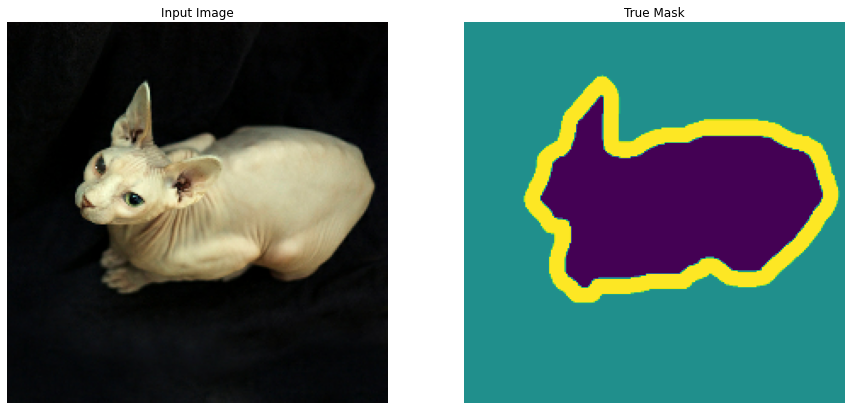

In [43]:
for image, mask in train.take(1):
    sample_image, sample_mask = image, mask

display([sample_image, sample_mask])

In [44]:
def create_mask(pred_mask):
    """
    예측 시 픽셀의 레이블을 확정하는 함수입니다.
    """
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [45]:
def show_predictions(dataset=None, num=1):
    """
    예측한 레이블을 시각화하는 함수입니다.
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
                create_mask(model.predict(sample_image[tf.newaxis, ...]))])

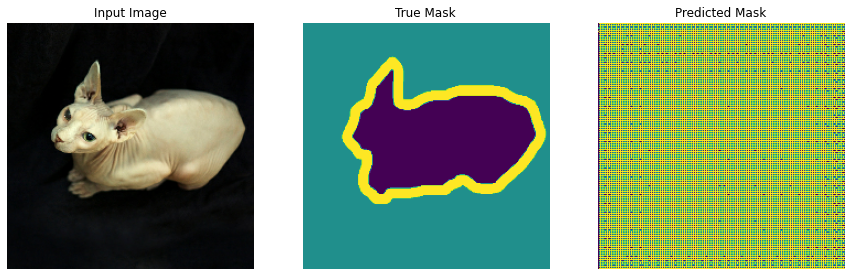

In [46]:
show_predictions()

In [51]:
from IPython.display import clear_output
class DisplayCallback(tf.keras.callbacks.Callback):
    """
    에포크마다 보여줄 수 있되
    매 에포크마다 이전 결과가 지워지도록 하는 Callback 클래스 입니다.
    """
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions()
        print ('\n에포크 이후 예측 예시 {}\n'.format(epoch+1))

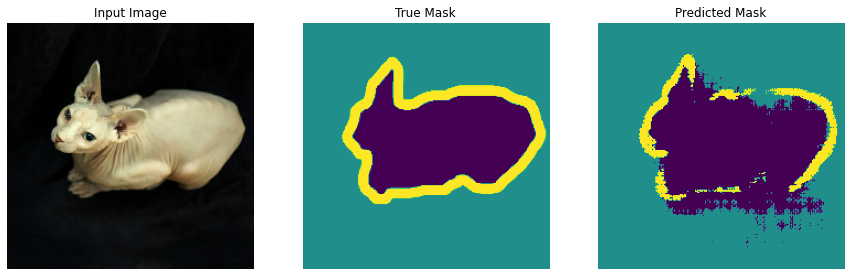


에포크 이후 예측 예시 30

57/57 [==============================] - 74s 1s/step - loss: 0.5314 - accuracy: 0.7811 - val_loss: 0.5460 - val_accuracy: 0.7761


In [55]:
EPOCHS = 30
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()])

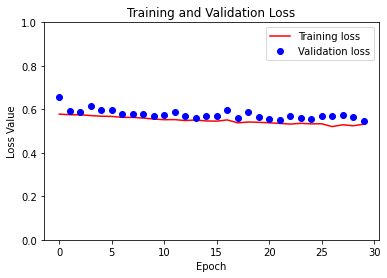

In [56]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

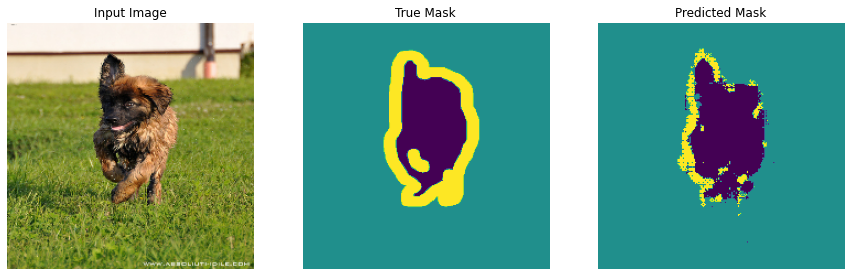

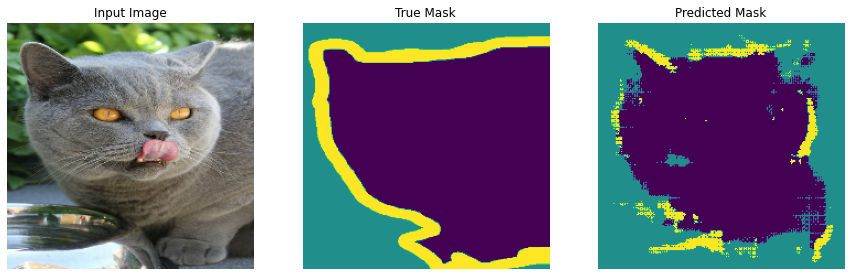

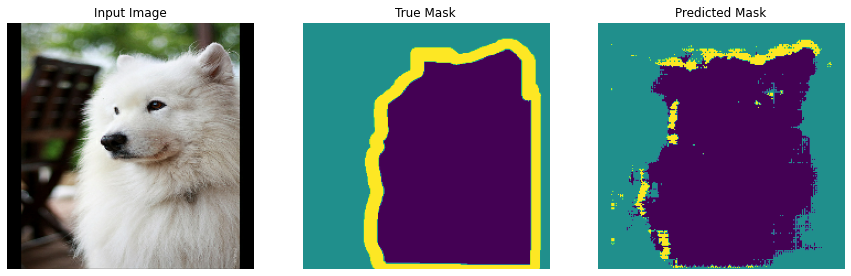

In [57]:
show_predictions(test_dataset, 3)

## 3. Free Response
> 동료들에게 설명한다고 생각하고 간단하게 몇 문장으로 작성하세요.

### 3.1 딥러닝이 왜 중요하다고 생각하시나요?

딥러닝은 사람처럼 학습을 하도록 만든 머신러닝 알고리즘입니다.

인간이 모든 것을 수동으로 해결하는 것에는 한계가 있습니다.

하지만 머신은 24시간 가동이 가능합니다. 또한 사람이 하기 힘든일을 대신 처리할 수 있습니다.

이미 딥러닝 기술이 발전해서 특정 분야에서 두각을 나타내고 있습니다.

이로인해 인간 대신 기계가 처리하는 영역이 점점 넓어지고 있습니다. 

때문에 이 딥러닝을 이해하고 있다면, 앞으로의 기술 발전 방향을 이해할 수 있고 살아남을 수 있지않을까 생각합니다...




### 3.2 딥러닝의 다양한 분야 중에서 좀 더 심도있게 배우고 싶은 분야는 무엇인가요? 왜 그렇게 생각하시나요?

아직은 세부적으로 나누지는 못했습니다.

컴퓨터 비전 분야와 자연어 처리에 관심이 있습니다.

둘중 굳이 고르자면 컴퓨터 비전 분야일 것 같습니다. (시각적으로 눈에 띄게 보여지는 결과물이 나와서 그런것 같습니다.)

앞으로는 VR과 AR이 좀 더 사업이 활발해질 것으로 생각됩니다.

때문에 가상공간에서 이미지를 생성해내는 것과, 음성을 생성해내는 것이 다음 세대에서 각광 받을 직업이 되지 않을까 생각합니다.



### 3.3 인공지능이 우리 사회에서 대체할 수 있는 직업이 무엇이라고 생각하시나요?


1. 판사
2. 검사
3. 회계

등등 사회 전반에 걸쳐 대체할 수 있을 것 같습니다.

### 3.4 반대로 인공지능 때문에, 딥러닝 때문에 더 생겨날 직업은 무엇이 있을까요?


시간이 흐를수록 인공지능을 도입할 수 있는 문턱은 더 낮아질 것입니다.

단순 반복이 가능한 직업들은 빠른 학습이 가능한 인공지능이 점차 차지하게 될 것입니다.

앞으로는 이 인공지능을 관리 감톡할 수 있는 분야가 많이 생겨날 것 같습니다.

또한 인공지능 개발을 위해 컴퓨터 및 수학 분야의 직업도 늘어날 것입니다.

### 3.5 여러분이 생각하실 때 Strong AI라고 불리우는 [일반 인공지능 (Artificial General Intelligence)](https://ko.wikipedia.org/wiki/%EC%9D%B8%EA%B3%B5_%EC%9D%BC%EB%B0%98_%EC%A7%80%EB%8A%A5)을 개발해내는 것이 가능할 것 같나요? 왜 그렇게 생각하시나요?

가능할 것 같습니다.

강인공지능은 다양한 분야에서 어떤 문제를 실제로 사고하고 해결할 수 있는 컴퓨터 기반의 인공지능입니다. 

인공지능이 이미지를 분류하고, 말하는 것을 인식하는 것은 어느정도 수준까지 와있습니다.

최근 구글에서 인공지능으로 직관력이 필요한 문제를 푸는데 성공했다고 합니다. 즉, 완전히 새로운 것을 발견할 수 있는 인공지능이 탄생한 것입니다.

이처럼 기술이 점점 빠르게 발전하고 있기 때문에 얼마 지나지 않아 강 인공지능이 등장할 것이라고 생각합니다.

### 3.6 Coutinous learning에 대해서 조사해보고 인지한 부분에 대해서 작성해보세요.

하나의 문제를 풀기 위해 모델을 학습시켜 성능이 좋은 모델을 만들었다고 가정할때,

시간이 흘러 입력의 데이터 분포가 달라지거나, 분류해야하는 클래스가 추가되면 모델을 새롭게 재학습 시켜야 합니다.

재학습을 시키게 되면 이전에 학습했던 데이터와 유사한 데이터셋을 학습하더라도 이전의 데이터셋에 대한 정보를 잊어버리게 됩니다.

하지만 인간은 지식을 일반화하여 장기기억으로 저장할 수 있으며, 새로운 지식을 학습할 때에 배경지식을 활용하고, 새로운 지식까지 장기기억으로 저장할 수 있습니다.

이렇게 인간처럼 이전에 학습했던 지식은 잊지 않으면서 새로운 데이터에 대한 정보까지 학습시키기 위해 나온것이 Coutinous learning입니다.

학습을 할 때마다 새로운 데이터/task를 지속적으로 학습하여 모델의 성능을 향상하는 방법을 Continual Learning, Lifelong Learning, Incremental Learning 혹은 Online Multi-task Learning이라고 부릅니다.



# Advanced Goals: 3점을 받기 위해서는 아래의 조건 중에서 3개 이상을 달성하셔야 합니다

### 1
    - 개구리 이외의 다른 객체를 탐지하는 모델을 만들어보세요 (예: 물고기)
    - 이미지를 예측한 label과 같이 출력해보세요
    - 예측 모델을 함수로 만들어 보세요 (물론 주석도 잘 되어있어야 합니다)
### 2
    - U-Net 을 직접 구현하여 동일한 문제를 수행해보세요. 
### 3
    - 작성한 답안을 몇 문장보다 조금 더 상세하게 작성해보세요
    - 왜 그렇게 생각하게 되었는 지 관련 근거를 서술하세요.
### 추가과제
    - GAN을 이용한 프로젝트를 새롭게 구현해보세요.